<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://discord.gg/n6cFeSPZdD">Discord</a> community for questions and discussions!

</div>

In [ ]:
# #unzip
# import glob
# import zipfile
# with zipfile.ZipFile('../coco_bridge.v3i.yolov5pytorch.zip', 'r') as zip_ref:
#         zip_ref.extractall('coco_bridge_dataset')

# Model Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [20]:
import os
import torch
import glob
import numpy as np
import cv2

In [2]:
# !gdown --id 1kWZpBUORpb4TvvVoKhE-NdGZO-AWHsNb

In [3]:
# %cd
# import zipfile
# zipfile.ZipFile("experimetal results/YOLOv5/dataset.zip", 'r').extractall("dataset")

In [4]:
# %cd "experimetal results/YOLOv5"
# !git clone https://github.com/ultralytics/yolov5  # clone
# %cd yolov5
# %pip install -qr requirements.txt  # install
# # 
# import torch
# import utils
# display = utils.notebook_init()  # checks

# 1. Train

In [21]:
%cd

/home/jupyter-iec-hainhanhien


In [22]:
config_file_template = '''
train: "/home/jupyter-iec-hainhanhien/experimetal results/YOLOv5/train/images"
val: "/home/jupyter-iec-hainhanhien/experimetal results/YOLOv5/test/images"

nc: 4
names: ['Bearing', 'Cover Plate Termination', 'Gusset Plate Connection', 'Out of Plane Stiffener']
'''

with open('data.yaml', 'w') as f:
    f.write(config_file_template)

In [6]:
# !wget https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x.pt

# 2. Validation and download .pt file

In [7]:
# !gdown --id 10onp8pybow318kO9v9jpJ7ux-P-nD-mm

In [23]:
%cd

/home/jupyter-iec-hainhanhien


In [24]:
!python "experimetal results/YOLOv5/yolov5/val.py" --weights "best.pt" --data "data.yaml" --img 640

val: data=data.yaml, weights=['best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=experimetal results/YOLOv5/yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to '/home/jupyter-iec-hainhanhien/experimetal': No such file or directory
YOLOv5 🚀 2023-8-29 Python-3.9.7 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12054MiB)

Fusing layers... 
Model summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /home/jupyter-iec-hainhanhien/experimetal results/YOLOv5/test/labe
                 Class     Images  Instances          P          R      mAP50   
                   all        136        547      0.889      0.798      0.846      0.449
               Bearing        136        147       0.86      0.857      0.892      0.469
Cover Plate Ter

In [10]:
# import shutil
# shutil.make_archive('../abc', 'zip', '/kaggle/working/yolov5/runs')

# 3. Predict

In [25]:
%cd 

/home/jupyter-iec-hainhanhien


In [26]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt', force_reload=True)  # local model


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/jupyter-iec-hainhanhien/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-31 Python-3.9.7 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12054MiB)

Fusing layers... 
Model summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
Adding AutoShape... 


In [27]:
from pandas import DataFrame
im = 'dataset/test/images/1_jpeg.rf.a90fb36348a49be2743aca7af9aa8310.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
#results.pandas()  # or .show(), .save(), .crop(), .pandas(), etc.
DataFrame(results.pandas().xyxy[0]).to_numpy()

array([[237.59927368164062, 394.06072998046875, 416.6826477050781, 639.8799438476562, 0.9452987313270569, 0, 'Bearing'],
       [286.2732238769531, 0.0, 341.3520202636719, 379.16033935546875, 0.8888054490089417, 3, 'Out of Plane Stiffener'],
       [477.3885498046875, 4.4025726318359375, 560.66650390625, 377.864501953125, 0.8854994773864746, 3, 'Out of Plane Stiffener'],
       [141.69261169433594, 0.0, 181.1073760986328, 380.09747314453125, 0.7587133646011353, 3, 'Out of Plane Stiffener'],
       [88.59667205810547, 392.68572998046875, 248.3907470703125, 640.0, 0.7423548698425293, 0, 'Bearing']], dtype=object)

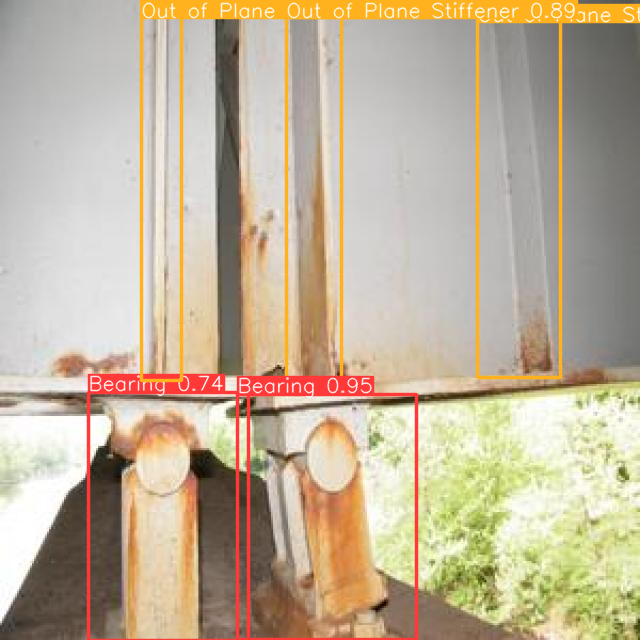

In [28]:
results.show()

In [29]:
def init_prediction(model, img, gr_path):
    !rm -r mAP/input/ground-truth/*
    !rm -r mAP/input/detection-results/*
    results = DataFrame(model(img).pandas().xyxy[0]).to_numpy()
    lis_res = []
#     print("Prediction:")
    for i in results:
        tmp = []
        tmp.append(i[5])
        tmp.append(i[4])
        tmp.append(i[0])
        tmp.append(i[1])
        tmp.append(i[2])
        tmp.append(i[3])
        lis_res.append(tmp)
#         print(tmp)

    pr_name_file = os.path.basename(os.path.normpath(gr_path))
    img_pr = 'mAP/input/detection-results/' + pr_name_file
    img_gr = 'mAP/input/ground-truth/' + pr_name_file
    !cp $gr_path mAP/input/ground-truth/
    !cp $gr_path mAP/input/detection-results/
    f = open(img_pr, 'w')
    for i in lis_res:
        for j in i:
            f.write(str(j)+' ')
        f.write('\n')
    f.close()

#     print("Ground truth:")
    f = open(gr_path, 'r')
    list_res = []
    tmp = f.readlines()
    for i in tmp:
        list_res.append(i.split())
        list_res[-1][0] = int(list_res[-1][0])
        list_res[-1][1] = float(list_res[-1][1])*640.0
        list_res[-1][2] = float(list_res[-1][2])*640.0
        list_res[-1][3] = float(list_res[-1][3])*640.0
        list_res[-1][4] = float(list_res[-1][4])*640.0
        #x_center, y_center, w, h
        x_center = list_res[-1][1]
        y_center = list_res[-1][2]
        w = list_res[-1][3]
        h = list_res[-1][4]
        #top, left, bottom, right
        top = y_center - h/2
        left = x_center - w/2
        bottom = y_center + h/2
        right = x_center + w/2

        list_res[-1][1] = left#torch.clamp(left, min=0, max=640)
        list_res[-1][2] = top#torch.clamp(top, min=0, max=640)
        list_res[-1][3] = right#torch.clamp(right, min=0, max=640)
        list_res[-1][4] = bottom#torch.clamp(bottom, min=0, max=640)

#         print(list_res[-1])
    f.close()

    f = open(img_gr, 'w')
    for i in list_res:
        for j in i:
            f.write(str(j)+' ')
        f.write('\n')
    f.close()

# 4. mAP calulation

In [30]:
%cd

/home/jupyter-iec-hainhanhien


In [13]:
%rm -rf mAP
!git clone https://github.com/SKN443/mAP.git

Cloning into 'mAP'...
remote: Enumerating objects: 829, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 829 (delta 135), reused 125 (delta 125), pack-reused 679
Receiving objects: 100% (829/829), 5.18 MiB | 525.00 KiB/s, done.
Resolving deltas: 100% (313/313), done.


In [14]:
f = open('mAP/scripts/class_list.txt', 'w')
f.write('0/n1/n2/n3/n4')
f.close()

In [15]:
%cd 

/home/jupyter-iec-hainhanhien


In [31]:
img_path = 'dataset/test/images/1_jpeg.rf.a90fb36348a49be2743aca7af9aa8310.jpg'
ground_truth_path = 'dataset/test/labels/1_jpeg.rf.a90fb36348a49be2743aca7af9aa8310.txt'

In [32]:
def get_mAP(model, img, gr_path):
    init_prediction(model, img, gr_path)
    !python3 mAP/main.py --no-plot --no-animation --quiet
    with open('mAP/output/output.txt', 'r') as file:
        data = file.read()
        mAP = float(data[data.find('mAP = ')+6:data.find('# Number of ground-truth ')-3])
        return mAP

In [33]:
def get_confidence(model, img, gr_path):
    #get_mAP(model, img, gr_path)
    with open('mAP/output.txt', 'r') as f:
        return float(f.read())

In [20]:
%pwd

'/home/jupyter-iec-hainhanhien'

In [34]:
print(get_mAP(model = model, img = img_path, gr_path = ground_truth_path))

mAP = 100.00%
100.0


# 5. Black box attacks

In [35]:
col = [+1, +1, +1, +0, +0, -1, -1, -1, +0]
row = [-1, +0, +1, +1, -1, -1, +0, +1, +0]

In [36]:
def simba_single(model, x_path, y_path, num_iters=10000, epsilon=4):
    x = cv2.imread(x_path)
    lis_pixel = np.random.randint(x.shape[0], size = (num_iters, 640*50, 2))
    for i in lis_pixel:
        y = np.copy(x)
        cur_confidence = get_confidence(model = model, img = x, gr_path = y_path)
        #print(cur_confidence)
        if (cur_confidence < 0.7):
            break
        atk = np.zeros(x.shape, dtype = int)
        for j in i:
            for k in range(9):
                if (j[0]+row[k]>=0 and j[0]+row[k]<640 and j[1]+col[k]>=0 and j[1]+col[k]<640):
                    atk[j[0]+row[k]][j[1]+col[k]] += np.random.choice(range(-epsilon, epsilon))
        x =  np.clip(y-atk, 0, 255)
        next_confidence = get_confidence(model = model, img = x, gr_path = y_path)
        if (next_confidence > cur_confidence):
            x = np.clip(y+atk, 0, 255)
            next_confidence = get_confidence(model = model, img = x, gr_path = y_path)
            if (next_confidence > cur_confidence):
                x = y
    print(x_path)
    return np.uint8(x)

In [24]:
%rm -rf attack4_l

In [25]:
%mkdir attack4_l
%cp -R dataset/test/* attack4_l

In [37]:
lis_img_path = glob.glob('attack4_l/images/*')
lis_gr_path = glob.glob('attack4_l/labels/*')
lis_img_path.sort()
lis_gr_path.sort()

In [38]:
len(lis_img_path)

136

In [39]:
lis_atk_id =range(len(lis_img_path)) #np.random.choice(range(len(lis_img_path)), size=len(lis_img_path)//5,
                              #replace=False) #Select 20% the number of images
lis_atk_img_path = [lis_img_path[i] for i in lis_atk_id]
lis_atk_gr_path = [lis_gr_path[i] for i in lis_atk_id]

In [40]:
get_confidence(model = model, img = lis_atk_img_path[3], gr_path = lis_atk_gr_path[3])

4.220671892166138

In [30]:
print(len(lis_atk_id))

136


In [31]:
%cd

/home/jupyter-iec-hainhanhien


In [32]:
lis_atk_img = [simba_single(model = model, x_path = lis_atk_img_path[i],
                            y_path = lis_atk_gr_path[i], num_iters = 20, epsilon = 10)
                            for i in range(len(lis_atk_id))]

attack4_l/images/0_jpeg.rf.1a67409fa0cde441d3daf94a5dfe460b.jpg
attack4_l/images/100_jpeg.rf.65b992130f70a06ee4e707b4f5d6dff2.jpg
attack4_l/images/101_jpeg.rf.719d8dfe7d43755b36791f70f18ad733.jpg
attack4_l/images/102_jpeg.rf.d15c4580f7988f137a77c73b1b30fa5b.jpg
attack4_l/images/103_jpeg.rf.04ba1c30ef25d39e6e1dabf95b972648.jpg
attack4_l/images/104_jpeg.rf.f455a9472806ee0584a1a17f7ea68c71.jpg
attack4_l/images/105_jpeg.rf.5c465049a1f40b81d8544b6ede653325.jpg
attack4_l/images/106_jpeg.rf.6643a0b5132a7773ce9c85f02f4f96be.jpg
attack4_l/images/107_jpeg.rf.f83e0c01041e931f8d9a00bed4ee9810.jpg
attack4_l/images/108_jpeg.rf.8953a89f4996c39ddee3afd1c723c08f.jpg
attack4_l/images/109_jpeg.rf.c6ca06fbcd6ac01625ed7325937430d9.jpg
attack4_l/images/10_jpeg.rf.c69433d0959040aa998d9c0699510e91.jpg
attack4_l/images/110_jpeg.rf.52720df681ca9f92aff7b5c4825071b2.jpg
attack4_l/images/111_jpeg.rf.e96b548e2787b35e9ad946f602010677.jpg
attack4_l/images/112_jpeg.rf.92897f3e9278f742a68604d5edde8c49.jpg
attack4_l/ima

In [5]:
!echo $is_atk_img_path

In [ ]:
for i in range(len(lis_atk_id)):
    # %rm $os.path.norpath(lis_atk_img_path[i])
    cv2.imwrite(lis_atk_img_path[i], lis_atk_img[i])

In [41]:
lis_atk_img_path[0]

'attack4_l/images/0_jpeg.rf.1a67409fa0cde441d3daf94a5dfe460b.jpg'

In [ ]:
# with open('atk_path4_m.txt', 'w') as file:
#     file.write('\n'.join(lis_atk_img_path))

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
print("hi")

hi


In [46]:
def show_atk(x_path, y_path):
    img = cv2.imread(x_path)
    x = simba_single(model = model, x_path = x_path,
                    y_path = y_path, num_iters = 40, epsilon = 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.axis("off")
    plt.imshow(x[:,:,::-1])
    plt.show()
    return (x, img)

In [37]:
# plt.axis("off")
# plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB))
# plt.show()

attack4_l/images/102_jpeg.rf.d15c4580f7988f137a77c73b1b30fa5b.jpg


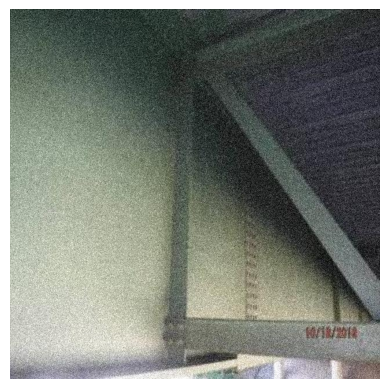

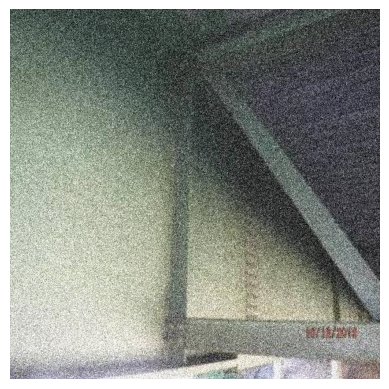

In [48]:
(a, b) = show_atk(lis_atk_img_path[3], lis_atk_gr_path[3])

attack4_l/images/101_jpeg.rf.719d8dfe7d43755b36791f70f18ad733.jpg


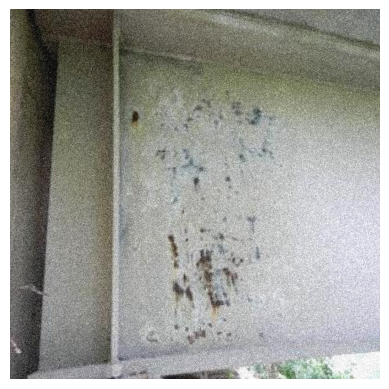

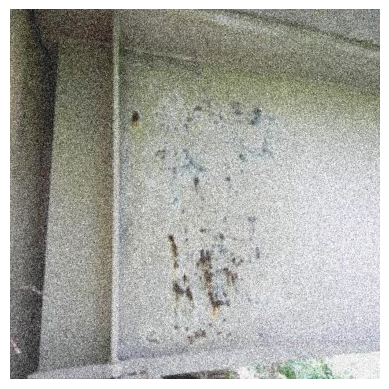

In [49]:
(a, b) = show_atk(lis_atk_img_path[2], lis_atk_gr_path[2])

attack4_l/images/100_jpeg.rf.65b992130f70a06ee4e707b4f5d6dff2.jpg


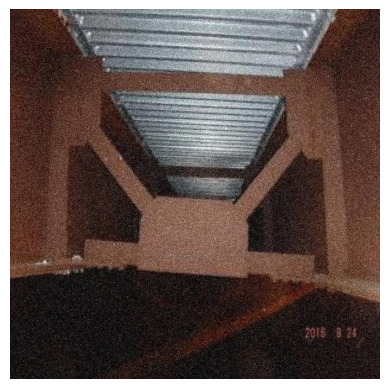

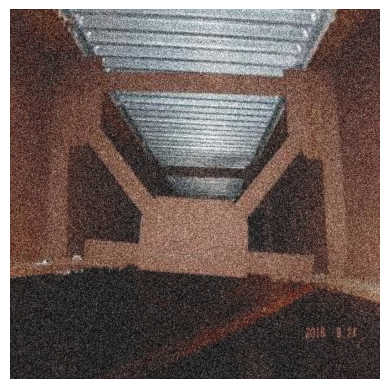

In [50]:
(a, b) = show_atk(lis_atk_img_path[1], lis_atk_gr_path[1])

attack4_l/images/0_jpeg.rf.1a67409fa0cde441d3daf94a5dfe460b.jpg


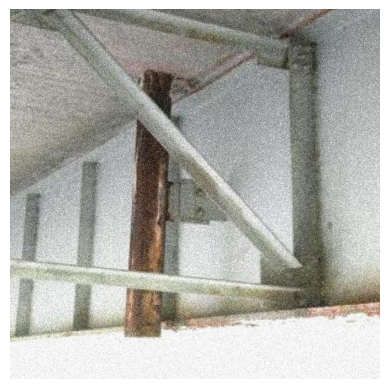

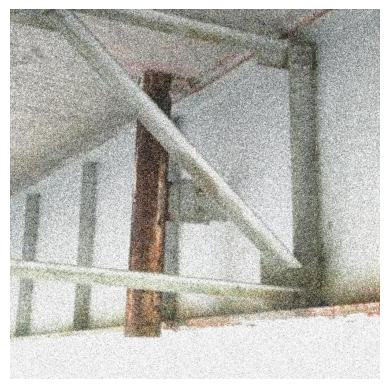

In [51]:
(a, b) = show_atk(lis_atk_img_path[0], lis_atk_gr_path[0])

In [52]:
get_confidence(model = model, img = a, gr_path = lis_atk_gr_path[0])

4.220671892166138

# Evaluation

In [53]:
lis_atk_img = [simba_single(model = model, x_path = lis_atk_img_path[i],
                            y_path = lis_atk_gr_path[i], num_iters = 100, epsilon = 4)
                            for i in range(len(lis_atk_id))]

attack4_l/images/0_jpeg.rf.1a67409fa0cde441d3daf94a5dfe460b.jpg
attack4_l/images/100_jpeg.rf.65b992130f70a06ee4e707b4f5d6dff2.jpg
attack4_l/images/101_jpeg.rf.719d8dfe7d43755b36791f70f18ad733.jpg
attack4_l/images/102_jpeg.rf.d15c4580f7988f137a77c73b1b30fa5b.jpg
attack4_l/images/103_jpeg.rf.04ba1c30ef25d39e6e1dabf95b972648.jpg
attack4_l/images/104_jpeg.rf.f455a9472806ee0584a1a17f7ea68c71.jpg
attack4_l/images/105_jpeg.rf.5c465049a1f40b81d8544b6ede653325.jpg
attack4_l/images/106_jpeg.rf.6643a0b5132a7773ce9c85f02f4f96be.jpg
attack4_l/images/107_jpeg.rf.f83e0c01041e931f8d9a00bed4ee9810.jpg
attack4_l/images/108_jpeg.rf.8953a89f4996c39ddee3afd1c723c08f.jpg
attack4_l/images/109_jpeg.rf.c6ca06fbcd6ac01625ed7325937430d9.jpg
attack4_l/images/10_jpeg.rf.c69433d0959040aa998d9c0699510e91.jpg
attack4_l/images/110_jpeg.rf.52720df681ca9f92aff7b5c4825071b2.jpg
attack4_l/images/111_jpeg.rf.e96b548e2787b35e9ad946f602010677.jpg
attack4_l/images/112_jpeg.rf.92897f3e9278f742a68604d5edde8c49.jpg
attack4_l/ima

In [54]:
%cd

/home/jupyter-iec-hainhanhien


In [55]:
config_file_template = '''
train: /home/jupyter-iec-hainhanhien/dataset/train/images
val: /home/jupyter-iec-hainhanhien/attack4_l/images

nc: 4
names: ['Bearing', 'Cover Plate Termination', 'Gusset Plate Connection', 'Out of Plane Stiffener']
'''

with open('attack4_l/data.yaml', 'w') as f:
    f.write(config_file_template)

In [56]:
!python "experimetal results/YOLOv5/yolov5/val.py" --weights "best.pt" --data "attack4_l/data.yaml" --img 640

val: data=attack4_l/data.yaml, weights=['best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=experimetal results/YOLOv5/yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to '/home/jupyter-iec-hainhanhien/experimetal': No such file or directory
YOLOv5 🚀 2023-8-29 Python-3.9.7 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3080 Ti, 12054MiB)

Fusing layers... 
Model summary: 267 layers, 46124433 parameters, 0 gradients, 107.7 GFLOPs
val: Scanning /home/jupyter-iec-hainhanhien/attack4_l/labels... 136 images, 0 ba
val: New cache created: /home/jupyter-iec-hainhanhien/attack4_l/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all        136        547      0.775      0.292      0.367      0.174
               Be

attack4_l/images/102_jpeg.rf.d15c4580f7988f137a77c73b1b30fa5b.jpg


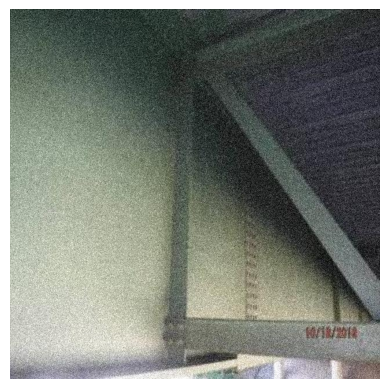

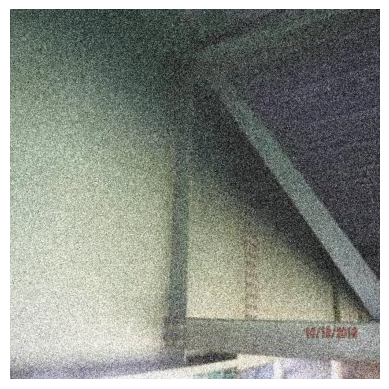

In [57]:
(a, b) = show_atk(lis_atk_img_path[3], lis_atk_gr_path[3])

# Visualization atk